# Data Processing for CWRU

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# copy file from google drive
import shutil

In [4]:
shutil.copy('/content/drive/My Drive/accelerometer_data.zip', '/content/')

'/content/accelerometer_data.zip'

In [5]:
# importing required modules 
from zipfile import ZipFile 

# specifying the zip file name 
file_name = "/content/accelerometer_data.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
	# printing all the contents of the zip file 
	zip.printdir() 

	# extracting all the files 
	print('Extracting all the files now...') 
	zip.extractall() 
	print('Done!')

File Name                                             Modified             Size
accelerometer data/                            2020-01-30 11:49:44            0
accelerometer data/098.csv                     2020-01-30 11:38:10     10369687
accelerometer data/099.csv                     2020-01-30 11:38:40     10878191
accelerometer data/100.csv                     2020-01-30 11:39:02     10900946
accelerometer data/106.csv                     2020-01-30 11:39:20      4024058
accelerometer data/107.csv                     2020-01-30 11:39:38      4028411
accelerometer data/108.csv                     2020-01-30 11:40:00      4052406
accelerometer data/119.csv                     2020-01-30 11:40:30      3987587
accelerometer data/120.csv                     2020-01-30 11:40:54      3993252
accelerometer data/121.csv                     2020-01-30 11:41:14      4000168
accelerometer data/131.csv                     2020-01-30 11:41:46      4038166
accelerometer data/132.csv              

In [0]:
# Three Motor Load (HP)
HP_1 = {0: '098.csv', 4: '106.csv', 1: '119.csv', 7: '131.csv', 5: '170.csv', 2: '186.csv', 8: '198.csv', 6: '210.csv', 3: '223.csv', 9: '235.csv'}
HP_2 = {0: '099.csv', 4: '107.csv', 1: '120.csv', 7: '132.csv', 5: '171.csv', 2: '187.csv', 8: '199.csv', 6: '211.csv', 3: '224.csv', 9: '236.csv'}
HP_3 = {0: '100.csv', 4: '108.csv', 1: '121.csv', 7: '133.csv', 5: '172.csv', 2: '173.csv', 8: '200.csv', 6: '212.csv', 3: '225.csv', 9: '237.csv'}

In [0]:
# List 10 types of fault
faults = {0: 'Normal Fault', 
          1: 'Ball Fault for 0.007 Fault Diameter',    # For Three Motor Load
          2: 'Ball Fault for 0.014 Fault Diameter',    # For Three Motor Load
          3: 'Ball Fault for 0.021 Fault Diameter',    # For Three Motor Load
          4: 'Inner Race Fault for 0.007 Fault Diameter',    # For Three Motor Load  
          5: 'Inner Race Fault for 0.014 Fault Diameter',    # For Three Motor Load
          6: 'Inner Race Fault for 0.021 Fault Diameter',    # For Three Motor Load
          7: 'Outer Race Fault for 0.007 Fault Diameter',    # For Three Motor Load
          8: 'Outer Race Fault for 0.014 Fault Diameter',    # For Three Motor Load
          9: 'Outer Race Fault for 0.021 Fault Diameter'     # For Three Motor Load
          }

In [0]:
import os
from six.moves.urllib.request import urlretrieve

import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
%matplotlib inline

In [0]:
# Create Training and test dataset for Motor Load (HP_0)
# We have missing data from Base on Normal
channels = ['DE_time', 'FE_time']   # assume they only used 'DE_time' and 'FE_time' for bearing fault detection

In [10]:
# change path
cd /content/accelerometer data

/content/accelerometer data


In [0]:
# Create DataFrame for Motor Load (HP) -> 1
HP_1_train = []
HP_1_test = []

In [0]:
# iterate accross dictionary
for key,val in HP_1.items():
    df = pd.read_csv(val)
    test_tmp = np.concatenate((df['DE_time'][:2048 * 25].values.reshape(25, 2048, 1), df['FE_time'][:2048 * 25].values.reshape(25, 2048, 1)), axis=2)
    HP_1_test.append(test_tmp)

In [13]:
len(HP_1_test)

10

In [15]:
HP_1_test[1].shape

(25, 2048, 2)

In [0]:
df = pd.read_csv('098.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483903 entries, 0 to 483902
Data columns (total 2 columns):
DE_time    483903 non-null float64
FE_time    483903 non-null float64
dtypes: float64(2)
memory usage: 7.4 MB


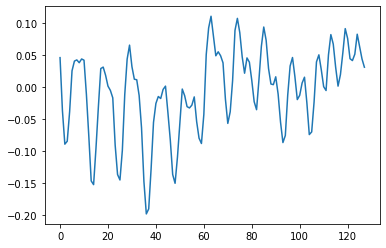

In [0]:
# how data looks like
sample = df['DE_time']
plt.plot(sample[:128])
plt.show()

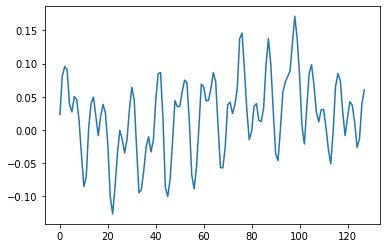

In [0]:
# how data looks like
sample = df['FE_time']
plt.plot(sample[:128])
plt.show()

In [0]:
# For Test set
# take 25 samples (each 2048 data points) from each series
# to fit keras input
sample_len = 2048
sample_test_cnt = 25

In [0]:
tmp = df['DE_time'][:sample_len * sample_test_cnt].values.reshape(sample_test_cnt, sample_len, 1)

In [0]:
tmp.shape

(25, 2048, 1)

In [0]:
tmp_1 = df['FE_time'][:sample_len * sample_test_cnt].values.reshape(sample_test_cnt, sample_len, 1)

In [0]:
tmp_1.shape

(25, 2048, 1)

In [0]:
test_tmp = np.concatenate((tmp, tmp_1), axis=2)

In [0]:
test_tmp.shape

(25, 2048, 2)

In [0]:
# For Training Data (660, 2048, 2)
sample_len = 2048
sample_train_cnt = 660
sample_train_shift = 103

In [0]:
tmp = df['DE_time'][sample_len * sample_test_cnt : sample_len * sample_test_cnt + sample_len].values.reshape(1, sample_len, 1)

In [0]:
tmp.shape

(1, 2048, 1)

In [0]:
for i in range(659):
  tmp_t = df['DE_time'][2048 * 25 + 103*(i+1) : 2048 * 25 + 2048+ 103*(i+1)].values.reshape(1, sample_len, 1)
  tmp = np.concatenate((tmp, tmp_t), axis=0)

In [0]:
tmp.shape

(660, 2048, 1)

In [0]:
tmp_1 = df['FE_time'][sample_len * sample_test_cnt : sample_len * sample_test_cnt + sample_len].values.reshape(1, sample_len, 1)

In [0]:
tmp_1.shape

(1, 2048, 1)

In [0]:
for i in range(659):
  tmp_1_t = df['DE_time'][2048 * 25 + 103*(i+1) : 2048 * 25 + 2048+ 103*(i+1)].values.reshape(1, sample_len, 1)
  tmp_1 = np.concatenate((tmp_1, tmp_1_t), axis=0)

In [0]:
tmp_1.shape

(660, 2048, 1)

In [0]:
train_tmp = np.concatenate((tmp, tmp_1), axis=2)

In [0]:
train_tmp.shape

(660, 2048, 2)